## Outlier Handling

In [1]:
from importlib import reload
import pandas as pd
import outlier_detection as od

reload(od)

<module 'outlier_detection' from 'e:\\Ames-Housing-Price-Predictor\\notebooks\\outlier_detection.py'>

### Load dataset

In [3]:
df = pd.read_parquet('../data/processed/03_data_imputed.parquet')  # acá debemos importar los datos procesados
df = df.astype({col: 'int64' for col in df.select_dtypes(include='Int64').columns})

### Encoding categorical variables

In [4]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
target = 'saleprice'

In [5]:
df_encoded = od.category_encoding(df, cat_features, target)

### PCA Reconstruction Outliers

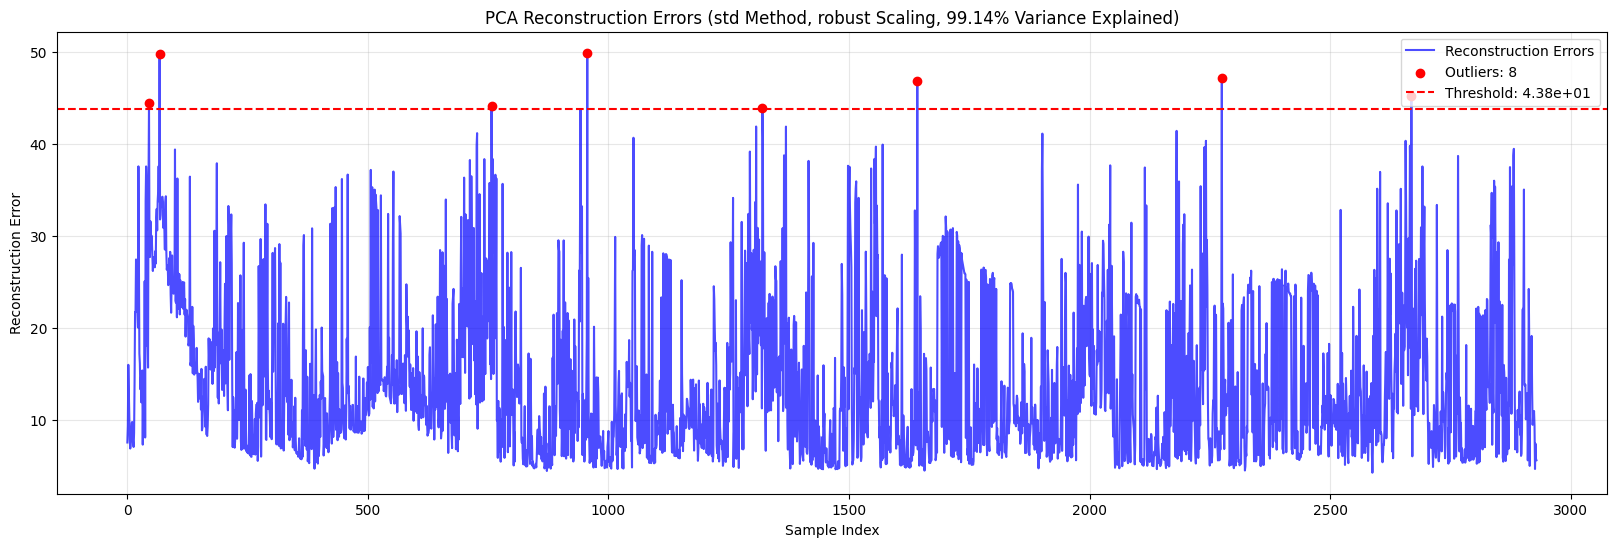

In [7]:
pca_outliers = od.pca_reconstruction_outliers(
    df=df_encoded,
    columns=df_encoded.columns,  # Excluir la columna de etiquetas
    var_explained=0.95,
    method='std',
    threshold_std=3.5,
    display_info=True
)

### Isolation Forest Outliers

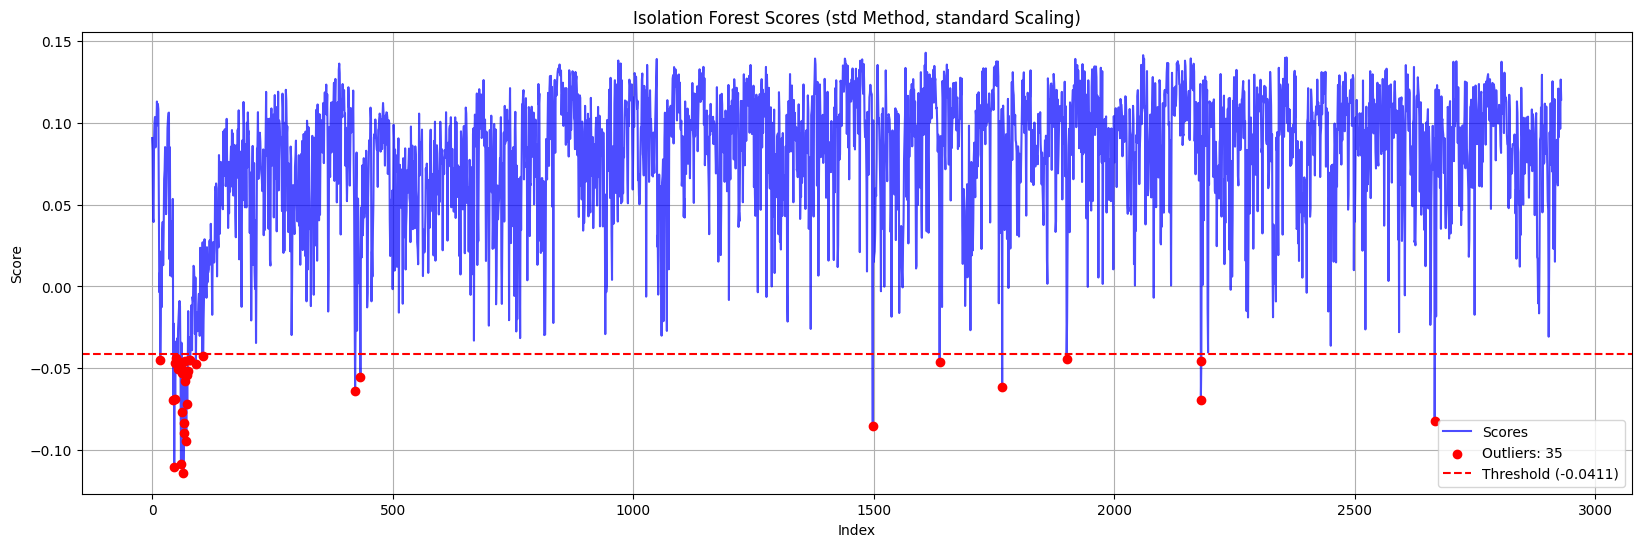

In [8]:
iso_outliers = od.isolation_forest_outliers(
    df=df_encoded,
    columns=df_encoded.columns,  # Excluir la columna de etiquetas
    method='std',
    threshold_std=3,    
    display_info=True
)

### Final Outliers

In [9]:
final_outliers = pca_outliers.intersection(iso_outliers)

In [10]:
df.iloc[pd.Index(final_outliers), :]

,ms_zoning,lot_frontage,lot_area,lot_shape,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,...,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,screen_porch,yr_sold,sale_type,sale_condition,saleprice
67,FV,92.0,9215.0,Reg,Inside,Somerst,Norm,Norm,1Fam,1Story,...,TA,TA,Y,0.0,136.0,0,2010,New,Partial,204500.0


There are 1 outliers, so I don't need to remove them.

In [11]:
df.to_parquet('../data/processed/04_outlier_handling.parquet', index=False)